In [238]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
import random
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.models import resnet18, vgg19
from copy import deepcopy


sns.set(style="whitegrid")

In [108]:
root_path = "c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset"

os.listdir(root_path)

['Apple', 'Banana', 'Strawberry']

In [109]:
class_path = []
label_path = []
image_path = []


for fruit in os.listdir(root_path):
    fruit_path = os.path.join(root_path , fruit)
    if os.path.isdir(fruit_path):
        for status in os.listdir(fruit_path):
            status_path = os.path.join(fruit_path , status)
            if os.path.isdir(status_path):
                class_path.append(status_path)
                label_path.append(f"{fruit}-{status}")
                for img in os.listdir(status_path):
                    img_path = os.path.join(status_path , img)

                    image_path.append(img_path)



In [110]:
for label in label_path:
    print(label)

Apple-Fresh
Apple-Rotten
Banana-Fresh
Banana-Rotten
Strawberry-Fresh
Strawberry-Rotten


In [111]:
image_path

['c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (1).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (1).png',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (1).webp',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (100).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (101).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (102).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (103).jpg',
 'c:/Users/Amir/Desktop/MLP/Fruit Freshness Dataset/Fruit Freshness Dataset\\Apple\\Fresh\\apple_fresh_001.jpg (104).jpg',
 'c:/Users/Amir/Deskt

C:\Users\Amir\AppData\Local\Temp\ipykernel_9120\4040072059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(label_count.keys()) , y = list(label_count.values()) , palette = "viridis")


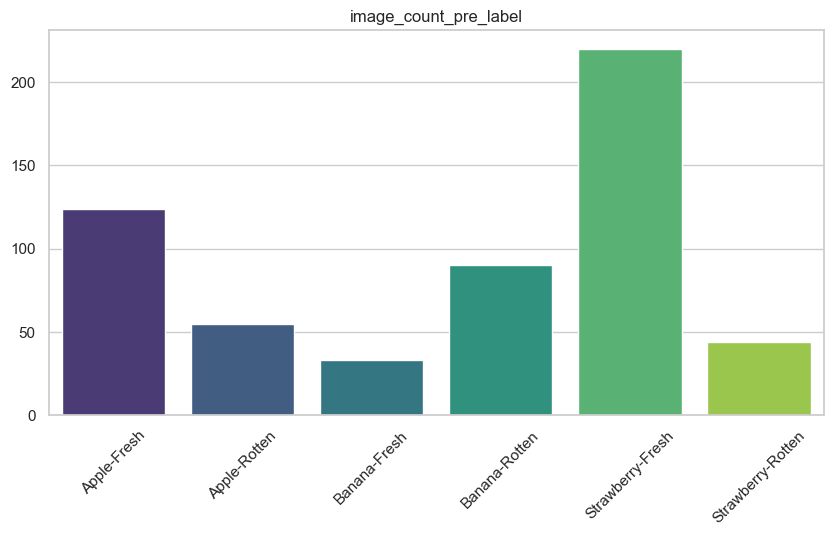

In [112]:
label_count = {label : len(os.listdir(path)) for label,path in zip(label_path , class_path)}


plt.figure(figsize = (10 , 5))
sns.barplot(x = list(label_count.keys()) , y = list(label_count.values()) , palette = "viridis")
plt.title("image_count_pre_label")
plt.xticks(rotation = 45)
plt.show()


In [113]:
print(label_count)

{'Apple-Fresh': 124, 'Apple-Rotten': 55, 'Banana-Fresh': 33, 'Banana-Rotten': 90, 'Strawberry-Fresh': 220, 'Strawberry-Rotten': 44}


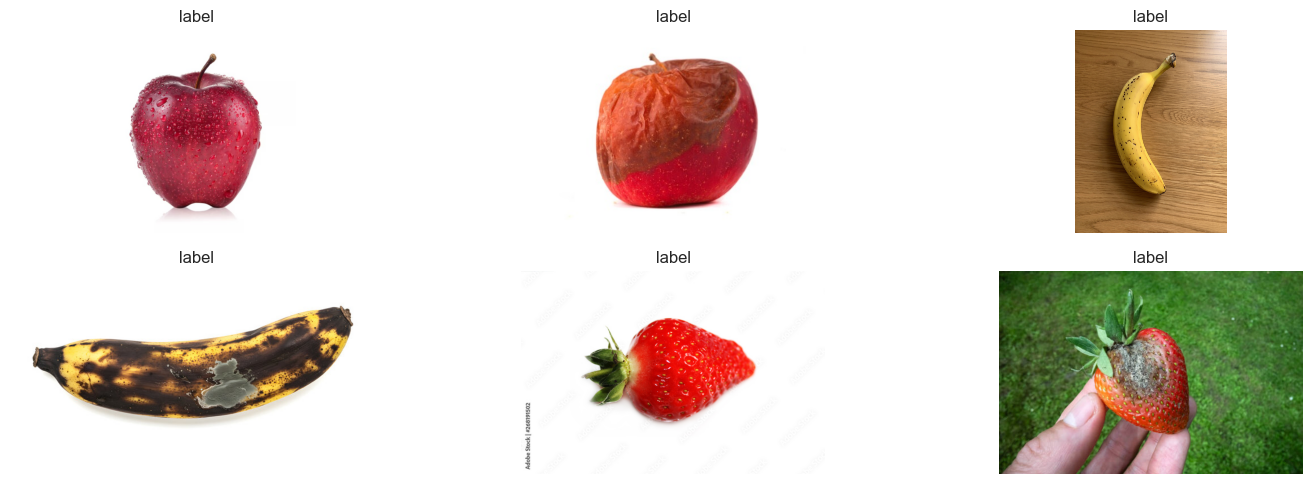

In [114]:
plt.figure(figsize=(15 , 5))

i = 1 
for path , label in zip(class_path , label_path):
    img_name = random.choice(os.listdir(path))
    img = Image.open(os.path.join(path , img_name))

    plt.subplot(2, 3 , i)
    plt.imshow(img)
    plt.title("label")
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()


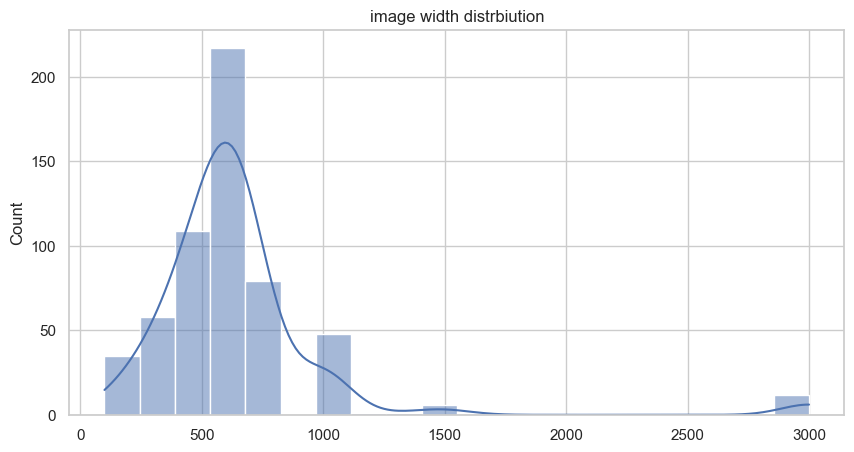

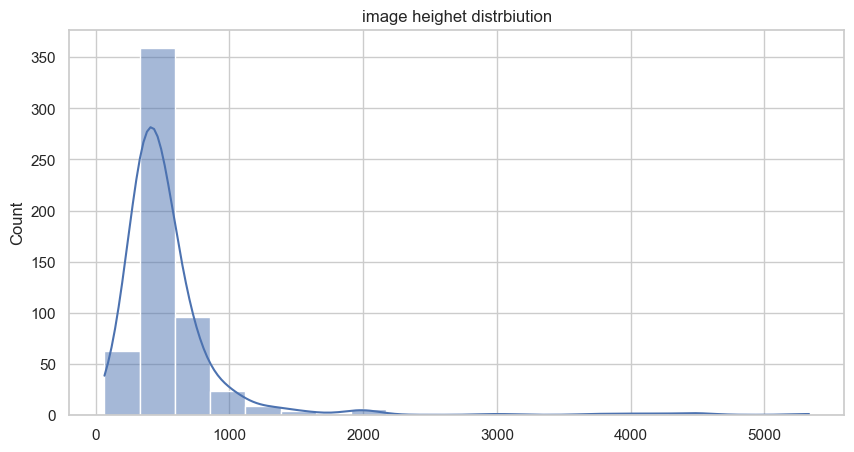

In [115]:
widths  = []
heighet = []

for path in class_path:
    for img_name in os.listdir(path):
        img = Image.open(os.path.join(path , img_name))
        w , h = img.size

        widths.append(w)
        heighet.append(h)



plt.figure(figsize=(10 , 5))
sns.histplot(widths , bins = 20 , kde = True)
plt.title("image width distrbiution")
plt.show()


plt.figure(figsize=(10 , 5))
sns.histplot(heighet , bins = 20 , kde = True)
plt.title("image heighet distrbiution")
plt.show()

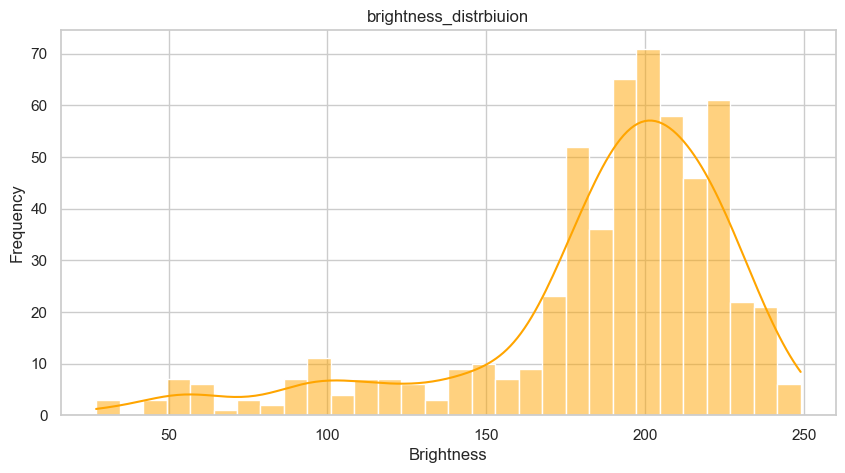

In [116]:
brightness_values = []


for path in image_path:
    img = Image.open(path)
    gray = cv2.cvtColor(np.array(img) , cv2.COLOR_RGB2GRAY)
    brightness_values.append(np.mean(gray))

plt.figure(figsize=(10, 5))
sns.histplot(brightness_values , bins=30 , kde=True , color= "orange")
plt.title("brightness_distrbiuion")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()

shape of x : (233, 12288)
num of labels : 233


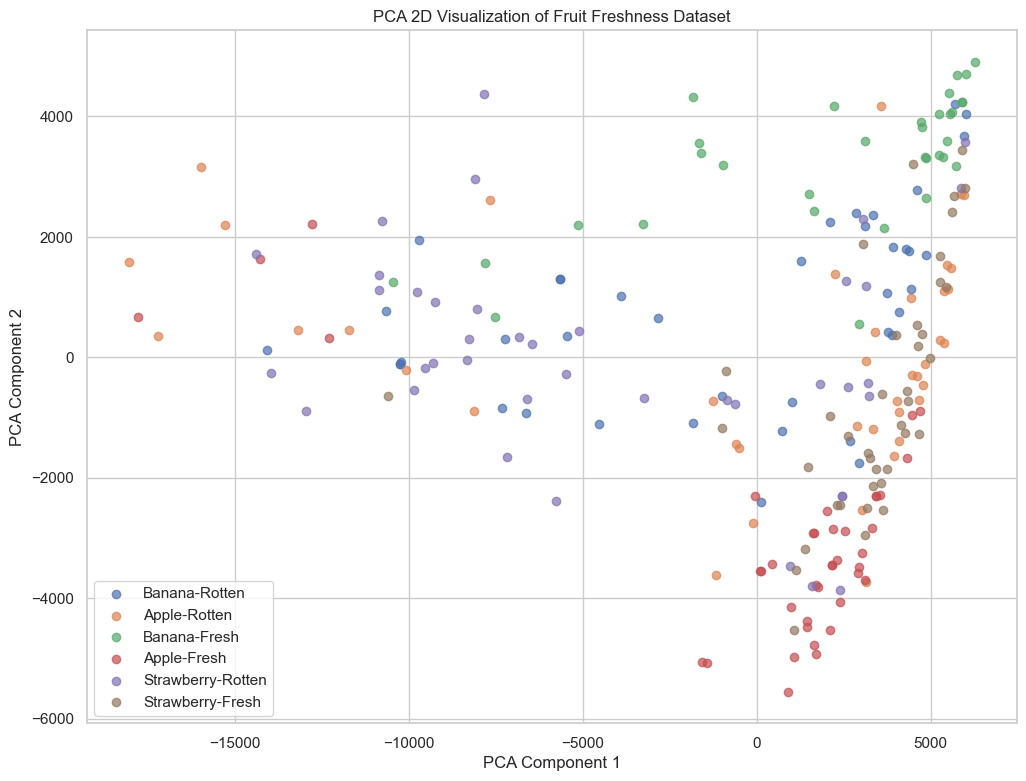

In [117]:
x = []
y = []

for path , label in zip(class_path , label_path):
    for img_name in os.listdir(path)[:40]:
        img_path = os.path.join(path , img_name)
        img = Image.open(img_path).convert("RGB")
        img = img.resize((64 , 64))
        x.append(np.array(img).flatten())
        y.append(label)

x = np.array(x)
y = np.array(y)
print("shape of x :" , x.shape)
print("num of labels :", len(y))




pca = PCA(n_components= 2)
x_pca = pca.fit_transform(x)




plt.figure(figsize=(12 , 9))
for label in set(y):
    idx = np.where(y == label)
    plt.scatter(x_pca[idx , 0] , x_pca[idx , 1] , label = label , alpha=0.7)

plt.title("PCA 2D Visualization of Fruit Freshness Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [118]:
class fruits:
    def __init__(self , root_path):
        self.root_path = root_path
        datadict = {"images" : [] , "labels" : []}



        for path in os.listdir(root_path):
            img_label = os.path.join(root_path , path)
            for status in os.listdir(img_label):
                image_status = os.path.join(img_label , status)
                for  image_path in os.listdir(image_status):
                    datadict["images"] += [os.path.join(image_status , image_path)]
                    datadict["labels"] += [status + ' '+path]

        self.df = pd.DataFrame(datadict)



    

In [193]:
train = fruits(root_path)
train = train.df

In [120]:
train

,images,labels
0,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Fresh Apple
1,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Fresh Apple
2,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Fresh Apple
3,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Fresh Apple
4,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Fresh Apple
...,...,...
561,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Rotten Strawberry
562,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Rotten Strawberry
563,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Rotten Strawberry
564,c:/Users/Amir/Desktop/MLP/Fruit Freshness Data...,Rotten Strawberry


In [195]:
index_label = dict()
label_index = dict()

for i, j in enumerate(train["labels"].unique()):
    index_label[i] = j
    label_index[j] = i

train["labels"] = train["labels"].map(label_index)

In [196]:
train["labels"].unique()

array([0, 1, 2, 3, 4, 5])

In [197]:
class PipeLine(Dataset):
    def __init__(self , data , transform):
        super(PipeLine , self).__init__()
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)
        
    def __getitem__(self , x):
        image , label = self.data[x , 0] , self.data[x , 1]

        image = Image.open(image).convert("RGB")
        image = np.array(image)
        image= self.transform(image)

        return image , label

In [198]:
transform = transforms.Compose([transforms.ToPILImage(),
                               transforms.ToTensor(),
                               transforms.Resize((224, 224)),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [199]:
train , val = train_test_split(train.values , random_state=42 , test_size=0.2 ,shuffle= True)
val , test = train_test_split(val , random_state=42 , test_size=0.5 ,shuffle=True)

train_ds = PipeLine(train , transform)
val_ds = PipeLine(val , transform)

train_loader = DataLoader(train_ds , batch_size= 16 , shuffle= True)
val_loader = DataLoader(val_ds , batch_size= 16 , shuffle= False)


In [200]:
for data , target in train_loader:
    break


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [203]:
target

tensor([3, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 3, 3, 5, 4, 4])

In [185]:
model = resnet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [186]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [204]:
model.fc = nn.Linear(in_features=model.fc.in_features , out_features= 6)

In [205]:
model.fc

Linear(in_features=512, out_features=6, bias=True)

In [206]:
model = model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters() , lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer ,step_size= 10 , gamma=0.1)

In [ ]:
epochs = 15
best_acc = 0

train_loss = []
train_acc = []
vall_loss = []
vall_acc = []

for i in range(0 , epochs+1):
    model.train()

    acc = 0 
    diff = 0
    total = 0


    for data , target in train_loader:
        optimizer.zero_grad()

        pred = model(data)
        loss = criterion(pred , target)

        diff += loss.item()
        acc += (pred.argmax(dim = 1) == target ).sum().item()
        total += pred.size(0)

        loss.backward()
        optimizer.step()


    train_loss.append(diff/total)
    train_acc.append(acc/total)


    model.eval()

    diff = 0
    acc = 0
    total = 0

    with torch.no_grad():
        for data , target in val_loader:

                pred = model(data)
                loss = criterion(pred , target)

                diff +=loss.item()
                acc += (pred.argmax(dim =1) == target).sum().item()
                total += pred.size(0)


        vall_loss.append(loss/total)
        vall_acc.append(acc/total)


    if vall_acc[-1] >= best_acc:
         best_acc = vall_acc[-1]

    
    scheduler.step()


    print("Epoch {} train loss {} acc {} val loss {} acc {}".format(i, train_loss[-1], train_acc[-1], vall_loss[-1], vall_acc[-1]))






        

Epoch 0 train loss 0.03261301808257019 acc 0.8362831858407079 val loss 0.0343872532248497 acc 0.49122807017543857
Epoch 1 train loss 0.03332976054037567 acc 0.827433628318584 val loss 0.04273281991481781 acc 0.45614035087719296
Epoch 2 train loss 0.022135925858355728 acc 0.9092920353982301 val loss 0.02155529148876667 acc 0.5087719298245614
Epoch 3 train loss 0.03316413590775193 acc 0.834070796460177 val loss 0.00624823896214366 acc 0.7543859649122807
Epoch 4 train loss 0.0240869039785018 acc 0.911504424778761 val loss 0.10390977561473846 acc 0.3684210526315789
Epoch 5 train loss 0.06789764026756835 acc 0.7721238938053098 val loss 0.007091127336025238 acc 0.7894736842105263
Epoch 6 train loss 0.018085093418779098 acc 0.911504424778761 val loss 0.006509812083095312 acc 0.8070175438596491
Epoch 7 train loss 0.01489030521165217 acc 0.911504424778761 val loss 0.006575508508831263 acc 0.8070175438596491
Epoch 8 train loss 0.013653257886458815 acc 0.9358407079646017 val loss 0.00512631749734

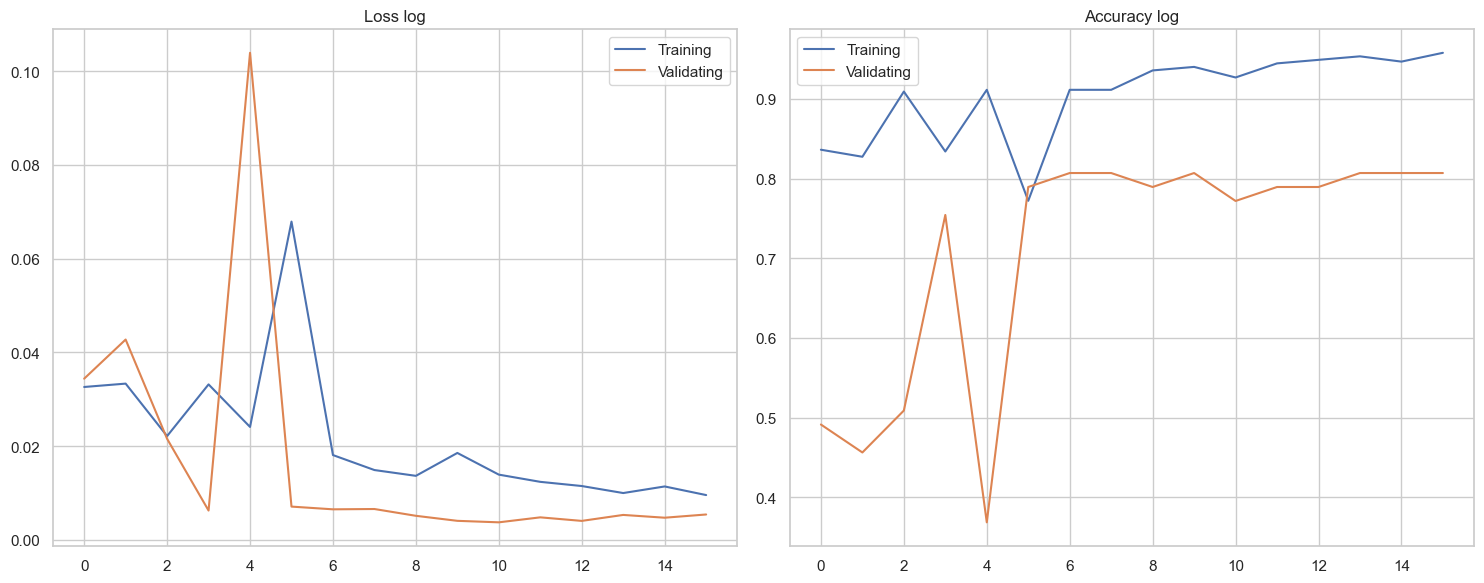

In [215]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

axes[index].plot(train_loss, label="Training")
axes[index].plot(vall_loss, label="Validating")
axes[index].set_title("Loss log")
axes[index].legend()

index += 1

axes[index].plot(train_acc, label="Training")
axes[index].plot(vall_acc, label="Validating")
axes[index].set_title("Accuracy log")
axes[index].legend()
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.75      0.75      0.75         4
           2       0.80      1.00      0.89         4
           3       1.00      0.70      0.82        10
           4       0.94      0.94      0.94        16
           5       0.62      0.83      0.71         6

    accuracy                           0.89        57
   macro avg       0.85      0.87      0.85        57
weighted avg       0.91      0.89      0.90        57



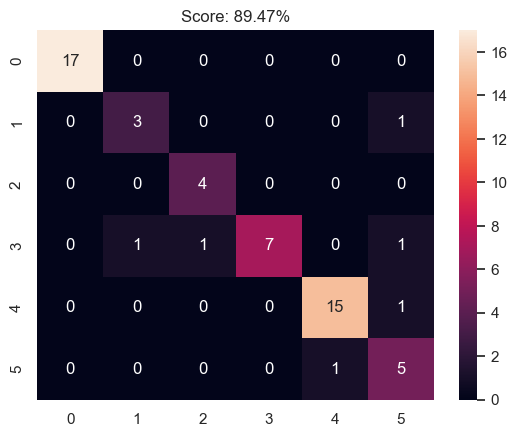

In [219]:
def predict(img):
    img = Image.open(img).convert("RGB")
    img = transform(np.array(img))
    img = img.view([1 , 3, 224 , 224])


    model.eval()
    with torch.no_grad():
        pred = model(img)

        index = pred.argmax(dim=1).item()


        return index , round(pred[0][index].item()*100, 2)
    

truth = []
preds = []
probs = []


for i in range(test.shape[0]):
    truth.append(test[i , 1])
    
    pred , prob = predict(test[i , 0])
    preds.append(pred)
    probs.append(prob)


score = accuracy_score(preds, truth)
print(classification_report(preds, truth))
sns.heatmap(confusion_matrix(preds, truth), annot=True, fmt='d')
plt.title("Score: {}%".format(round(score*100, 2)))
plt.show()


In [239]:
model = resnet18(pretrained = True)


c:\Users\Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Amir/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [02:42<00:00, 288kB/s] 


In [242]:
model.fc = nn.Linear(in_features = model.fc.in_features, out_features =6)

In [243]:
epochs = 15
best_acc = 0

train_loss = []
train_acc = []
vall_loss = []
vall_acc = []

for i in range(1 , epochs+1):
    model.train()

    acc = 0 
    diff = 0
    total = 0


    for data , target in train_loader:
        optimizer.zero_grad()

        pred = model(data)
        loss = criterion(pred , target)

        diff += loss.item()
        acc += (pred.argmax(dim = 1) == target ).sum().item()
        total += pred.size(0)

        loss.backward()
        optimizer.step()


    train_loss.append(diff/total)
    train_acc.append(acc/total)


    model.eval()

    diff = 0
    acc = 0
    total = 0

    with torch.no_grad():
        for data , target in val_loader:

                pred = model(data)
                loss = criterion(pred , target)

                diff +=loss.item()
                acc += (pred.argmax(dim =1) == target).sum().item()
                total += pred.size(0)


        vall_loss.append(loss/total)
        vall_acc.append(acc/total)


    if vall_acc[-1] >= best_acc:
         best_acc = vall_acc[-1]

    
    scheduler.step()


    print("Epoch {} train loss {} acc {} val loss {} acc {}".format(i, train_loss[-1], train_acc[-1], vall_loss[-1], vall_acc[-1]))

Epoch 0 train loss 0.11309010845369998 acc 0.16592920353982302 val loss 0.03151831775903702 acc 0.17543859649122806
Epoch 1 train loss 0.11278276105897617 acc 0.16371681415929204 val loss 0.03170597180724144 acc 0.17543859649122806
Epoch 2 train loss 0.11397500824084324 acc 0.17256637168141592 val loss 0.031700871884822845 acc 0.12280701754385964
Epoch 3 train loss 0.11356546551780364 acc 0.17920353982300885 val loss 0.03183550015091896 acc 0.17543859649122806
Epoch 4 train loss 0.11363747715950012 acc 0.1504424778761062 val loss 0.031624872237443924 acc 0.15789473684210525
Epoch 5 train loss 0.11375838729132594 acc 0.16150442477876106 val loss 0.03215566650032997 acc 0.15789473684210525
Epoch 6 train loss 0.11291705507092771 acc 0.16371681415929204 val loss 0.03178277611732483 acc 0.17543859649122806
Epoch 7 train loss 0.11395657563631513 acc 0.16592920353982302 val loss 0.031944286078214645 acc 0.14035087719298245
Epoch 8 train loss 0.1134788699909649 acc 0.16371681415929204 val loss

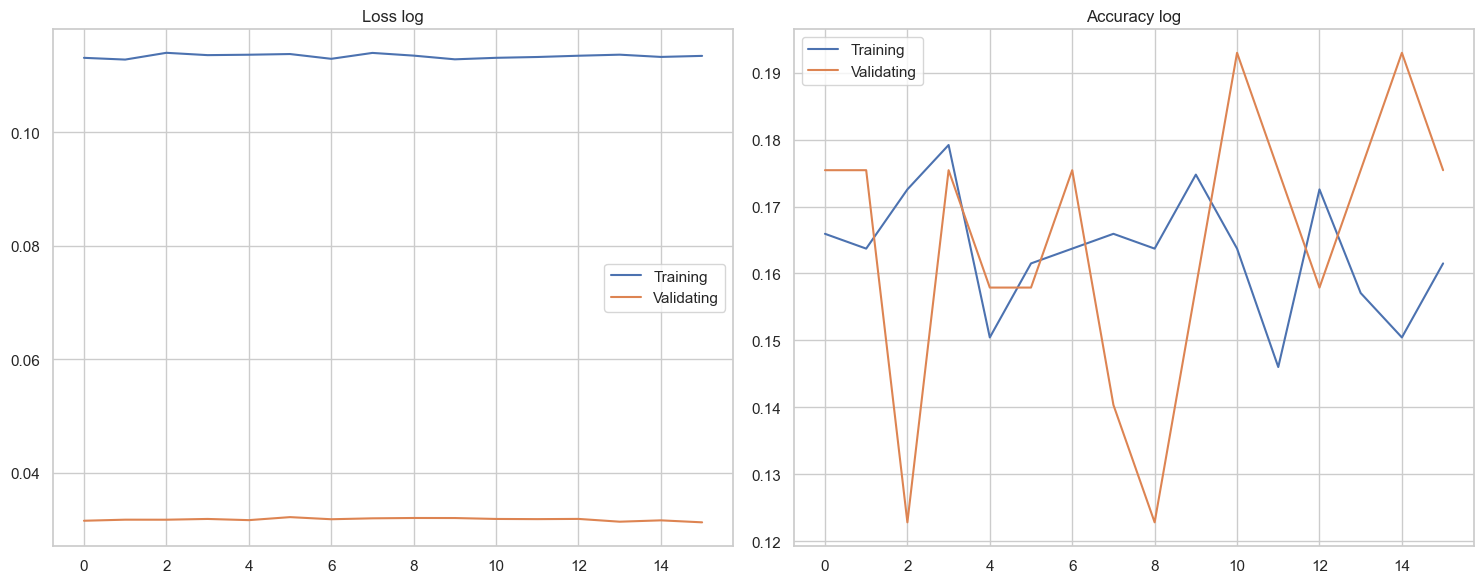

In [244]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

axes[index].plot(train_loss, label="Training")
axes[index].plot(vall_loss, label="Validating")
axes[index].set_title("Loss log")
axes[index].legend()

index += 1

axes[index].plot(train_acc, label="Training")
axes[index].plot(vall_acc, label="Validating")
axes[index].set_title("Accuracy log")
axes[index].legend()
plt.tight_layout()
plt.show()

In [222]:
model_1 = vgg19()
model_1

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [227]:
model_1.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [228]:
model_1.classifier[6] = nn.Linear(in_features=model_1.classifier[6].in_features , out_features= 6)

In [235]:
epochs = 15
best_acc = 0
best_model = deepcopy(model)

train_loss = []
train_acc = []
vall_loss = []
vall_acc = []


for i in range(1 , epochs + 1):
    model.train()

    diff = 0
    acc = 0
    total = 0

    for data , target in train_loader:
        optimizer.zero_grad()

        pred = model(data)
        loss = criterion(pred , target)

        diff += loss.item()
        acc += (pred.argmax(dim=1) == target).sum().item()
        total += pred.size(0)

        loss.backward()
        optimizer.step()

    train_loss.append(diff/total)
    train_acc.append(acc/total)

    model.eval()

    diff = 0
    acc = 0
    total = 0

    with torch.no_grad():
        for data , target in val_loader:
            pred = model(data)
            loss = criterion(pred , target)


            diff += loss.item()
            acc += (pred.argmax(dim=1) == target).sum().item()
            total += pred.size(0)


        vall_loss.append(diff/total)
        vall_acc.append(acc/total)


    if vall_acc[-1] >= best_acc:
        best_acc = vall_acc[-1]
        best_model = deepcopy(model)

    scheduler.step()

    print("Epoch {} train loss {} acc {} val loss {} acc {}".format(i, train_loss[-1], train_acc[-1],vall_loss[-1], vall_acc[-1]))

        






Epoch 1 train loss 0.011444149167993954 acc 0.9535398230088495 val loss 0.03446137231954357 acc 0.8070175438596491
Epoch 2 train loss 0.009609435384153528 acc 0.9491150442477876 val loss 0.03384469874333917 acc 0.8070175438596491
Epoch 3 train loss 0.012826658826552133 acc 0.9579646017699115 val loss 0.03395417424147589 acc 0.7894736842105263
Epoch 4 train loss 0.009478497656836974 acc 0.9623893805309734 val loss 0.03498117834852453 acc 0.8245614035087719
Epoch 5 train loss 0.009786794551409187 acc 0.9557522123893806 val loss 0.035986293760830894 acc 0.8070175438596491
Epoch 6 train loss 0.010334013396692751 acc 0.9535398230088495 val loss 0.03531021095420185 acc 0.8245614035087719
Epoch 7 train loss 0.0123270480786409 acc 0.9513274336283186 val loss 0.035363961991510894 acc 0.7894736842105263
Epoch 8 train loss 0.009890436833576027 acc 0.9557522123893806 val loss 0.03482935760627713 acc 0.8421052631578947
Epoch 9 train loss 0.009545581407053808 acc 0.9646017699115044 val loss 0.034403

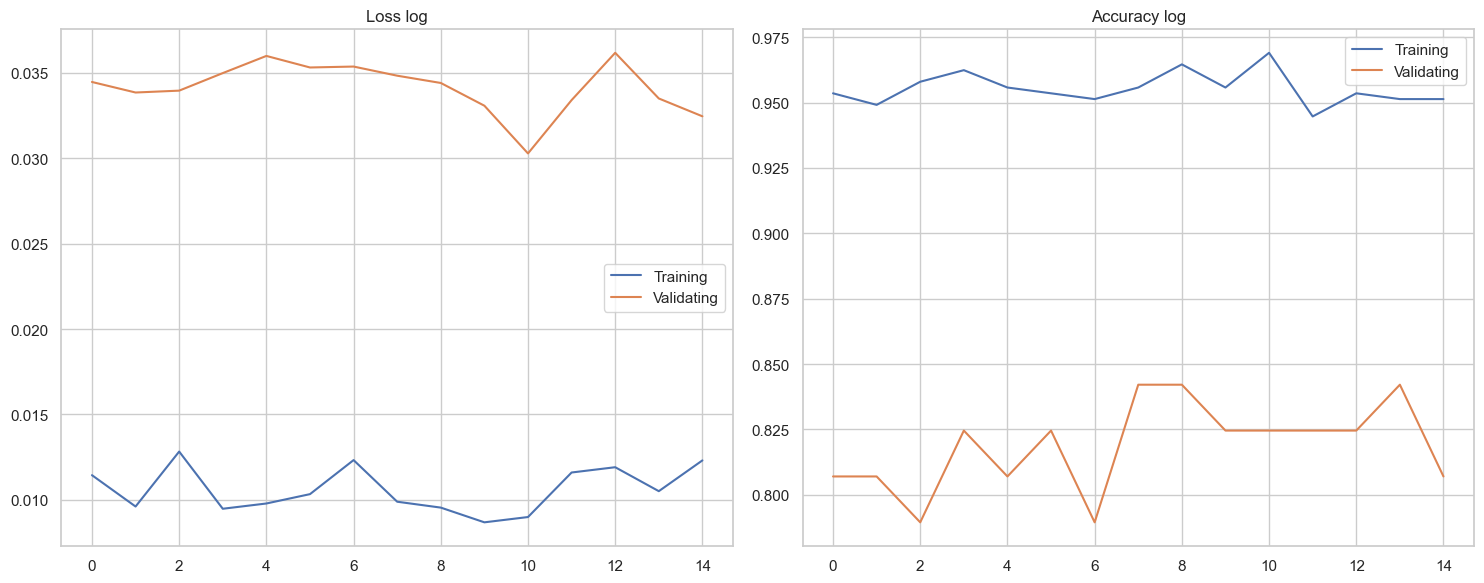

In [236]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

axes[index].plot(train_loss, label="Training")
axes[index].plot(vall_loss, label="Validating")
axes[index].set_title("Loss log")
axes[index].legend()

index += 1

axes[index].plot(train_acc, label="Training")
axes[index].plot(vall_acc, label="Validating")
axes[index].set_title("Accuracy log")
axes[index].legend()
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.35      0.30      0.32        20
           1       0.25      0.06      0.10        16
           2       0.00      0.00      0.00         1
           3       0.14      0.12      0.13         8
           4       0.06      0.50      0.11         2
           5       0.25      0.20      0.22        10

    accuracy                           0.19        57
   macro avg       0.18      0.20      0.15        57
weighted avg       0.26      0.19      0.20        57



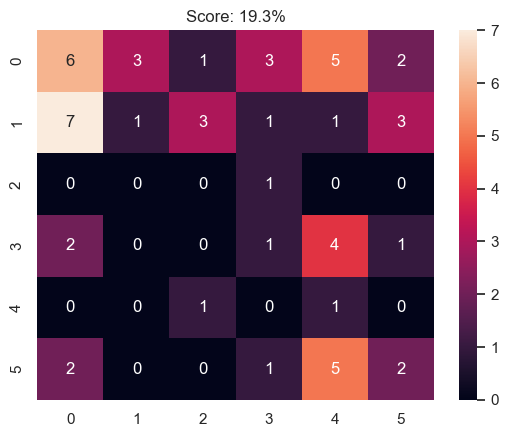

In [237]:
def predict(img):
    img = Image.open(img).convert("RGB")
    img = transform(np.array(img))
    img = img.view([1 , 3, 224 , 224])


    model.eval()
    with torch.no_grad():
        pred = model_1(img)

        index = pred.argmax(dim=1).item()


        return index , round(pred[0][index].item()*100, 2)
    

truth = []
preds = []
probs = []


for i in range(test.shape[0]):
    truth.append(test[i , 1])
    
    pred , prob = predict(test[i , 0])
    preds.append(pred)
    probs.append(prob)


score = accuracy_score(preds, truth)
print(classification_report(preds, truth))
sns.heatmap(confusion_matrix(preds, truth), annot=True, fmt='d')
plt.title("Score: {}%".format(round(score*100, 2)))
plt.show()
